# Loan Data Exploration
## by Yaron Shamash

## Preliminary Wrangling

This document explores a dataset containing loan amounts, borrower information, and interest rates for approximately 114,000 loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import warnings

warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
loans= pd.read_csv('prosperLoanData.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
print(loans.shape) #show df number of rows and columns
print(loans.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [5]:
loans.head() # display top 10 rows

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

Number of observations (data points): There are 113,937 with 81 columns describing the data. The characteristics of the variables in the data set. Which includes: dtypes: bool(3), category(1), float64(50), int64(11), object(17).

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the APR or interest rate of the loans in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the loan amount will have the strongest effect on each loan's APR: the larger the loan, the higher the interest rate. I also think that other factors such as borrower credit rating, debt/income ratio and income will have effects on the APR, though to a much smaller degree than the main effect of loan amount.

## Univariate Exploration

I'll start by doing a brief cleaning of the data set by dropping the duplicates and checking for rows with NAs. And also deleting the duplicates.

In [6]:
loans.duplicated().sum()

0

In [7]:
loans.duplicated(subset='LoanNumber').sum()

871

In [8]:
loans.drop_duplicates('LoanNumber',inplace=True) # drop duplicated rows

In [9]:
loans.duplicated().sum()

0

In [10]:
loans.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84113
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

I'll start by inspecting distribution of the main variable of interest: Borrower Rate.

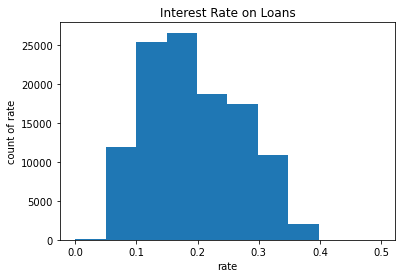

In [11]:
plt.hist(data = loans, x = 'BorrowerRate')
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.show()

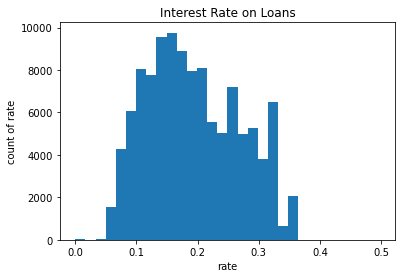

In [12]:
plt.hist(data = loans, x = 'BorrowerRate', bins=30) #increased bins
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.show()

The distribution of rates appears to be relatively normal and bimodal with peaks at around .15 and .25.  Lets look at loan amount.  

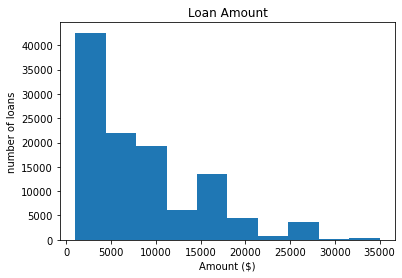

In [13]:
plt.hist(data = loans, x = 'LoanOriginalAmount', bins=10)
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.show()

The data on loan amount is highly skewed to the right and will require a log transform.  Half of loans issued were under 5,000 Usd.  The highest peaks are around 5k,10k, and 15k.

In [14]:
loans.LoanOriginalAmount.describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

In [15]:
np.log10(loans.LoanOriginalAmount.describe())# set the scale

count    5.053332
mean     3.919850
std      3.794976
min      3.000000
25%      3.602060
50%      3.799341
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

The log scale of loan amounts shows that the highest frequency is between $3,471 and $4,146.


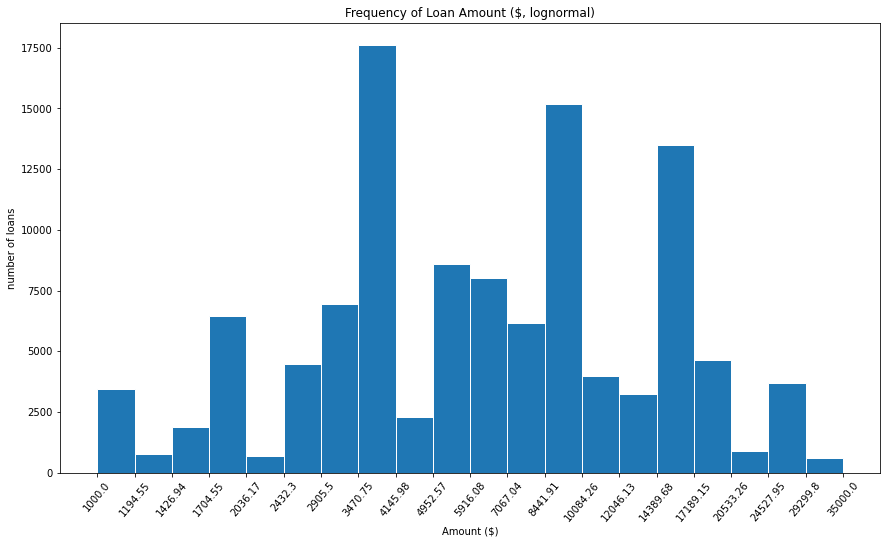

In [16]:
text = 'The log scale of loan amounts shows that the highest frequency is between $3,471 and $4,146.'
print(text)
# Use the log10 values directly
loans["log10amount"] = np.log10(loans.LoanOriginalAmount)
# Instead, just set the number of bins (20 - 30, up to 50 if skewed)
# hist - edgecolor add borders to the bars (again, for ease of interpretation)
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data = loans, x  = 'log10amount',
                            bins = 20, edgecolor = "white")
# The bins are in log10, get original units
new_labels = [10**(x) for x in bins]
# round the labels (you can do this in the step above)
new_labels = [round(x,2) for x in new_labels]
# set the tick labels to be the same as the bins
plt.title('Frequency of Loan Amount ($, lognormal)');
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.xticks(bins,new_labels)
plt.xticks(rotation=50);

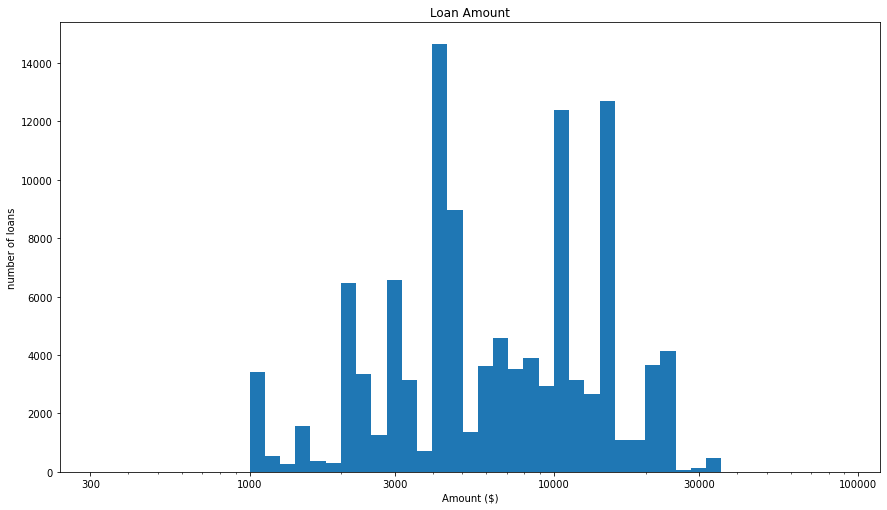

In [17]:
# axis transformation
plt.figure(figsize=[14.70, 8.27])
bins = 10 ** np.arange(2.5, 5, 0.05)
ticks = [300, 10**3, 3000, 10**4, 30000, 10**5]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = loans, x= 'LoanOriginalAmount', bins = bins);
plt.title('Frequency of Loan Amount ($, lognormal)');


# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')


# Apply x-ticks
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.xticks(ticks, labels);

Loan Amount using log scaling shows to be normal with a bimodal distribution.

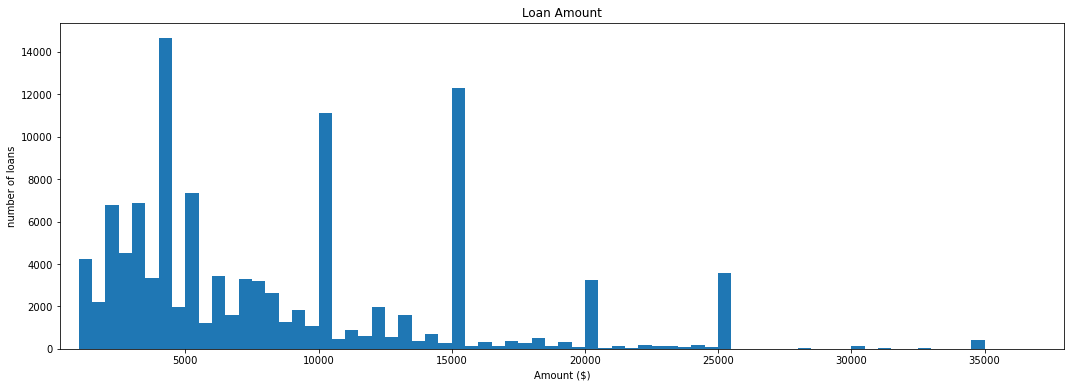

In [18]:
# univariate plot of loan amount

binsize=500
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=(18,6))
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([300,38000])
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.show()

In the case of loan amount, the small bin size proves very illuminating. There are very large spikes in frequency at the bars beginning with around 3500 USD which was noted in the log plot above.  Then, there are big spikes in frequency at intervals of 5,000 USD all the way up to 35,000 USD loan amount.  Frequency quickly trails off until the next spike. These probably represent standard loan amounts,

Next, I'll look at the next variable of interest which is Debt to Income Ratio.

In [19]:
loans.DebtToIncomeRatio.describe()

count    104594.000000
mean          0.276032
std           0.553738
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

There are huge outliers in this column with the bulk of the data under .32 and a max of 10.

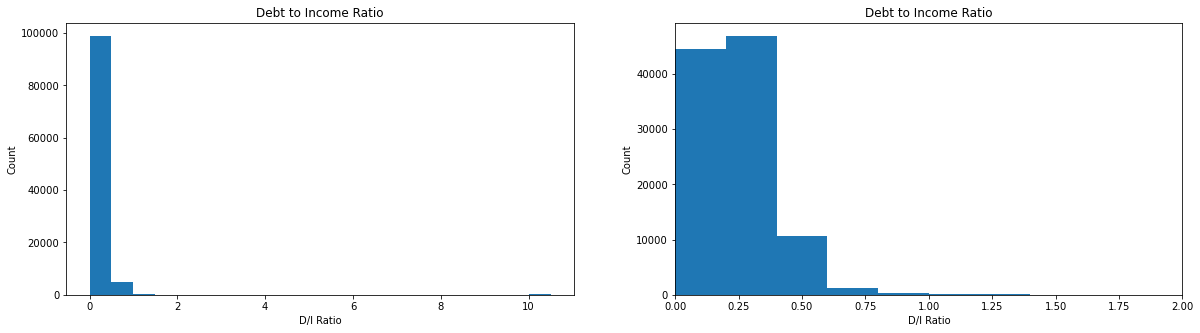

In [20]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loans['DebtToIncomeRatio'].max()+0.5, 0.5)
plt.hist(data=loans, x='DebtToIncomeRatio', bins = bin_edges)
plt.title('Debt to Income Ratio')
plt.xlabel('D/I Ratio')
plt.ylabel('Count')

# histogram on right: focus in on bulk of data < 2
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, loans['DebtToIncomeRatio'].max()+0.2, 0.2)
plt.hist(data=loans, x='DebtToIncomeRatio', bins = bin_edges)
plt.title('Debt to Income Ratio')
plt.xlabel('D/I Ratio')
plt.ylabel('Count')
plt.xlim(0, 2); # could also be called as plt.xlim((0, 2))

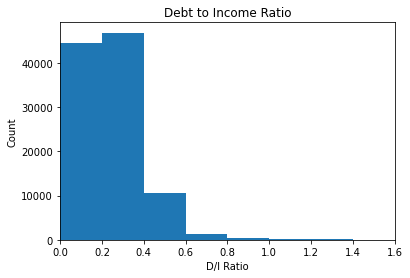

In [21]:
bins = np.arange(0, loans['DebtToIncomeRatio'].max()+0.2, 0.2)
plt.hist(data=loans, x='DebtToIncomeRatio', bins=bins);
plt.title('Debt to Income Ratio')
plt.xlabel('D/I Ratio')
plt.ylabel('Count')
# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,1.6));

As the subplots above show, the bulk of the data for Debt to Income is under 1.0 and should be viewed with limits on the x axis.  Most borrowers (75%) had a D/E ratio of less than .32 with almost all of the borrowers having a ratio of less than .6, but there are huge outliers ( see the describe function above) that will have to be addressed in later modeling.

Employment Status variable is nominal and categorical and should be viewed in order from highest to lowest count.

In [22]:
loans['EmploymentStatus'].value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

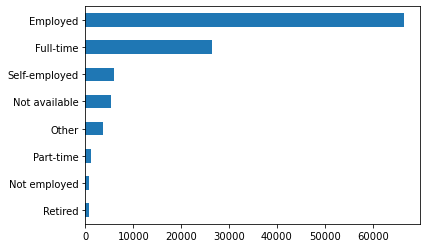

In [23]:
# Bar chart using matplotlib
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'EmploymentStatus' column, and sort it in starting with 8 in descending order
# Returns a Series
loans['EmploymentStatus'].value_counts()[8::-1].plot(kind='barh'); # horizontal view 

Operations used.  
* Negative index- You can index lists or series in two directions, forwards or backwards
A negative index starts at the end and works backwards
* Reverse Order
To reverse the order of a list, you use [::-1]

Observation from the EmploymentStatus column is that most borrowers are employed.

Listing Category column tells us what the loan will be used for.  Lets investigate further.

In [24]:
listing_counts = loans['ListingCategory (numeric)'].value_counts()
listing_counts

1     57624
0     16965
7     10448
2      7388
3      7157
6      2568
4      2395
13     1987
15     1507
18      882
14      863
19      764
20      762
5       756
16      304
11      214
8       196
10       91
9        85
12       58
17       52
Name: ListingCategory (numeric), dtype: int64

In [25]:
listing_order = listing_counts.index
listing_order

Int64Index([1, 0, 7, 2, 3, 6, 4, 13, 15, 18, 14, 19, 20, 5, 16, 11, 8, 10, 9,
            12, 17],
           dtype='int64')

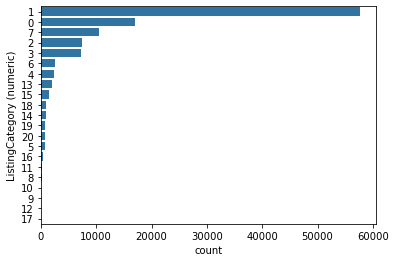

In [26]:
base_color = sb.color_palette()[0]
sb.countplot(data=loans, y='ListingCategory (numeric)', color=base_color,order=listing_order);

The numericially categorized bar charts can be changed to proper labels using the pandas map function.  In order to do this, we first have to creat a new column.

In [27]:
#create a new column for loan type from ListingCategory (numeric)
loan_type_markers= {0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement", 3: "Business", 4: "Personal Loan", 5: "Student Use", 6: "Auto", 7: "Other", 8: "Baby&Adoption", 9: "Boat", 10: "Cosmetic Procedure", 11: "Engagement Ring", 12: "Green Loans", 13: "Household Expenses", 14: "Large Purchases", 15: "Medical/Dental", 16: "Motorcyle", 17: "RV", 18: "Taxes", 19: "Vacation", 20: "Wedding Loans"}

In [28]:
loan_type_markers

{0: 'Not Available',
 1: 'Debt Consolidation',
 2: 'Home Improvement',
 3: 'Business',
 4: 'Personal Loan',
 5: 'Student Use',
 6: 'Auto',
 7: 'Other',
 8: 'Baby&Adoption',
 9: 'Boat',
 10: 'Cosmetic Procedure',
 11: 'Engagement Ring',
 12: 'Green Loans',
 13: 'Household Expenses',
 14: 'Large Purchases',
 15: 'Medical/Dental',
 16: 'Motorcyle',
 17: 'RV',
 18: 'Taxes',
 19: 'Vacation',
 20: 'Wedding Loans'}

In [29]:
loans['ListingCat']= loans['ListingCategory (numeric)'].map(loan_type_markers)# map function  to apply labels 

In [30]:
loans[['ListingCat','ListingCategory (numeric)']]

,ListingCat,ListingCategory (numeric)
0,Not Available,0
1,Home Improvement,2
2,Not Available,0
3,Motorcyle,16
4,Home Improvement,2
...,...,...
113932,Debt Consolidation,1
113933,Other,7
113934,Debt Consolidation,1
113935,Home Improvement,2


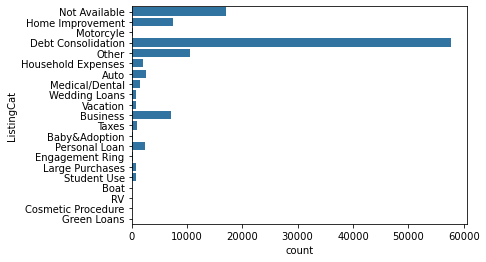

In [31]:
base_color = sb.color_palette()[0] # plot using new column
sb.countplot(data=loans, y='ListingCat', color=base_color);

The majority of loans were used for debt consolidation.  

The Credit Rating and Prosper Rating columns will be investigated next.  Both columns will first have to be categorically ordered for proper viewing.

In [32]:
loans['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

In [33]:
loan_rating = ['HR', 'E', 'D', 'C', 'B','A','AA'] #order the ProsperRating column from high risk to AA borrowers
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = loan_rating)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_var)

In [34]:
loans['ProsperRating (Alpha)'].unique()

[NaN, A, D, B, E, C, AA, HR]
Categories (7, object): [HR < E < D < C < B < A < AA]

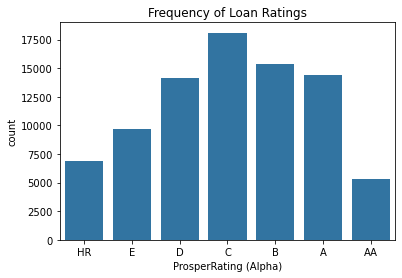

In [35]:
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', color = base_color);# bar chart of ProsperRating (Alpha)
plt.title('Frequency of Loan Ratings');

Distribution of loans based on ProsperRating shows that most loans went to C rated borrowers.

In [36]:
loans['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [37]:
credit_rating= ['NC','HR','E','D','C','B','A','AA']#order the CreditGrade column from low credit worthy to high borrowers
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = credit_rating)
loans['CreditGrade'] = loans['CreditGrade'].astype(ordered_var)

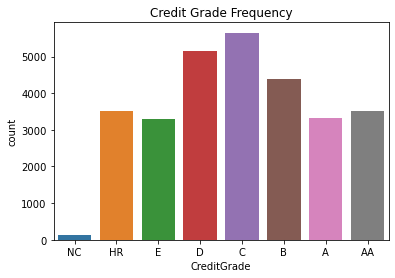

In [38]:
# univariate plot for CreditGrade
sb.countplot(data = loans, x = 'CreditGrade')
loans['CreditGrade'].value_counts()
plt.title('Credit Grade Frequency');

The distribution of Credit Grade shows that the most amount of loans went to C grade borrowers, followed by D and B, respectively.

The borrowers income should play a role in determining the rate on a loan.  Lets take a look at the Income of borrowers with the Income Range column first, and then Stated monthly income.

In [39]:
loans.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [40]:
borrower_income = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = borrower_income)
loans['IncomeRange'] = loans['IncomeRange'].astype(ordered_var)#order the IncomeRange column from lowest to highest incomes

In [41]:
loans.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

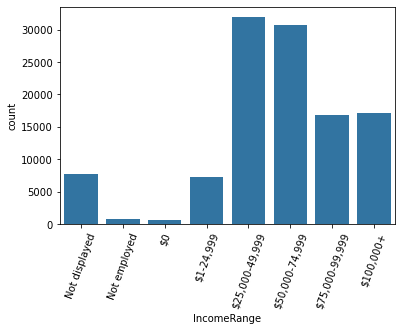

In [42]:
#ordered bar chart of income range of borrowers
base_color = sb.color_palette()[0]
sb.countplot(data=loans, x='IncomeRange', color = base_color)
plt.xticks(rotation=70);

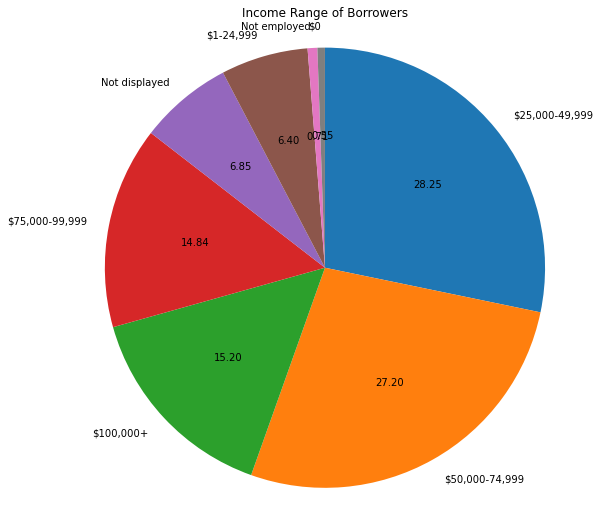

In [43]:
plt.figure(figsize = [12, 9])# pie chart of income range of borrowers-

sorted_counts = loans['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%.2f',
        counterclock = False);
plt.axis('square')
plt.title('Income Range of Borrowers')
plt.show()

The Pie chart nicely shows that over half of borrowers have incomes over 25,000 Usd.  Lets take a closer look at incomes.

In [44]:
loans['StatedMonthlyIncome'].value_counts()

4166.666667    3486
5000.000000    3367
3333.333333    2889
3750.000000    2399
5416.666667    2351
               ... 
5804.500000       1
8170.666667       1
3512.000000       1
5721.583333       1
3843.500000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

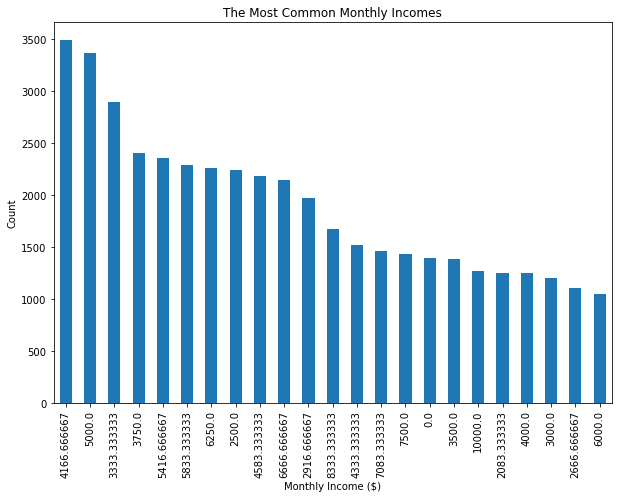

In [45]:
plt.figure(figsize = [10, 7])# ordered bar chart of stated monthly incomes ( top 10)
top=loans.groupby('StatedMonthlyIncome').filter(lambda x: len(x) >= 1000) #1,000 (4 spaces) count minimum filter applied
top['StatedMonthlyIncome'].value_counts().plot(kind = 'bar')
plt.title('The Most Common Monthly Incomes')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Count');

The most common monthly incomes are between 4,000 and 6,000 Usd.

Lets look at the distribution of the Stated Monthly Income column

In [46]:
loans.StatedMonthlyIncome.describe()

count    1.130660e+05
mean     5.605120e+03
std      7.495596e+03
min      0.000000e+00
25%      3.199396e+03
50%      4.666667e+03
75%      6.824688e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [47]:
# using the pandas set function to convert from scientific notation to regular
pd.set_option('float_format', '{:f}'.format)

In [48]:
loans.StatedMonthlyIncome.describe()

count    113066.000000
mean       5605.119580
std        7495.595563
min           0.000000
25%        3199.395833
50%        4666.666667
75%        6824.687500
max     1750002.916667
Name: StatedMonthlyIncome, dtype: float64

In [49]:
bins = np.arange(0, loans['StatedMonthlyIncome'].max()+1000, 1000)# creat bins using describe function parameters
bins

array([0.000e+00, 1.000e+03, 2.000e+03, ..., 1.749e+06, 1.750e+06,
       1.751e+06])

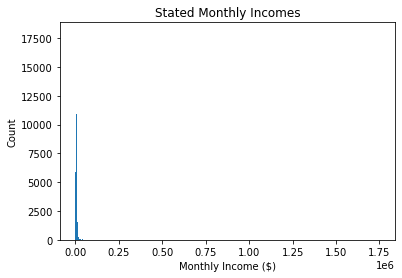

In [50]:
plt.hist(data=loans, x='StatedMonthlyIncome', bins=bins)# histogram of stated monthly income
plt.title('Stated Monthly Incomes')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Count');

There appears to be huge outliers in the Stated Monthly Income Column.  1st attempt at histogram fails.  Lets set the upper bound to exclude the 1%.

In [51]:
#create intervals of .01 from 0 to 1
np.arange(0,1+.01,.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [52]:
loans.StatedMonthlyIncome.describe(np.arange(0,1+.01,.01))

count    113066.000000
mean       5605.119580
std        7495.595563
min           0.000000
0%            0.000000
             ...      
97%       14194.400000
98%       16333.333333
99%       20500.000000
100%    1750002.916667
max     1750002.916667
Name: StatedMonthlyIncome, Length: 106, dtype: float64

In [53]:
loans.StatedMonthlyIncome.describe(np.arange(0,1+.01,.01)).tail(20)# display bottom 20 results

82%       7875.625000
83%       8000.000000
84%       8299.500000
85%       8333.333333
86%       8500.000000
87%       8750.000000
88%       9166.666667
89%       9333.333333
90%       9750.000000
91%      10000.000000
92%      10416.666667
93%      10833.333333
94%      11500.000000
95%      12250.000000
96%      12916.666667
97%      14194.400000
98%      16333.333333
99%      20500.000000
100%   1750002.916667
max    1750002.916667
Name: StatedMonthlyIncome, dtype: float64

The 99 percentile is a little more than 20,000, and the max is 1.75 million.  That is a huge outlier that needs to be removed

In [54]:
bins = np.arange(0, loans['StatedMonthlyIncome'].quantile(.99).max()+1000, 1000) # bins with outlier removed using max()
bins

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
       16000., 17000., 18000., 19000., 20000., 21000.])

Plot excluding the 1% outlier below

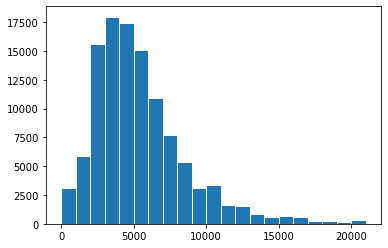

In [55]:
plt.hist(data=loans, x='StatedMonthlyIncome', bins=bins, edgecolor="white"); # edgecolor adds borders to the bars

Histogram 2nd attempt successful .  Stated monthly income with the outlier removed appears to be normally distributed and slightly skewed to the right.  Another way to remove outliers is to limit the bins directly.

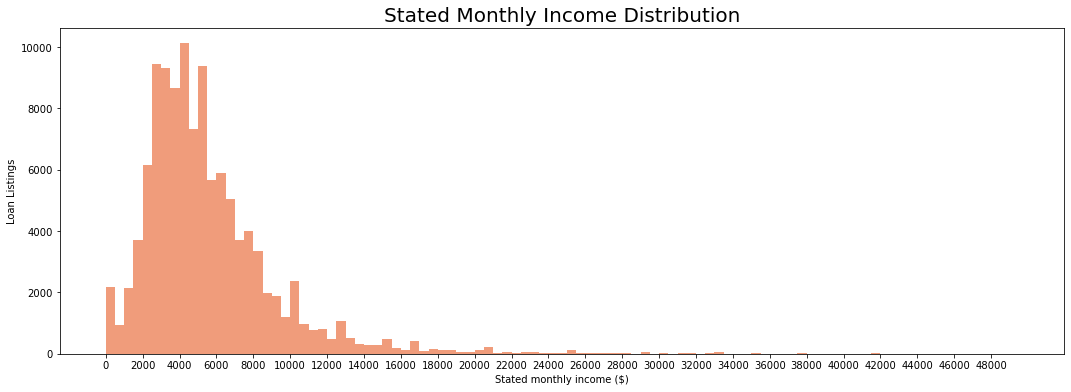

In [56]:
#alternate method 50K limit on bins
base_color = sb.color_palette('RdBu')[1]
bins = np.arange(0, 50000, 500)
plt.figure(figsize=(18,6))
plt.hist(data = loans, x ='StatedMonthlyIncome', color=base_color, bins=bins);
#plt.xticks(0, 50000, 1000) doesnt work causes overlap
plt.xticks(np.arange(0, 50000, step=2000)) # using step 1000 causes overlap in ticks.  step 2000 works
plt.title('Stated Monthly Income Distribution',fontsize=20);
plt.xlabel('Stated monthly income ($)');
plt.ylabel("Loan Listings");
 

In [57]:
#using the pandas reset function to convert df back to original notation
pd.reset_option('all'),


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



(None,)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Borrower rate was normally distributed.  Loan Amount was log normally distributed.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The Prosper Rating and Credit Grade columns are categorical data and were ordered based on the borrowers risk profile.  

A new column was created "ListingCat" which used a list created from ListingCategory (numeric) and later matched to using the map method.

The Stated Monthly income column had outliers which had to be removed in order to properly view. And also scientific notation which was converted and then reset after the univariate analysis was complete.

The Debt/Equity ratio and Stated Monthly Income columns had outliers which were removed for proper viewing.

## Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in the data with the focus being on how each variable directly and indirectly affects the borrower rate.

To visualize 2 numeric variables, scatter plot is a good option

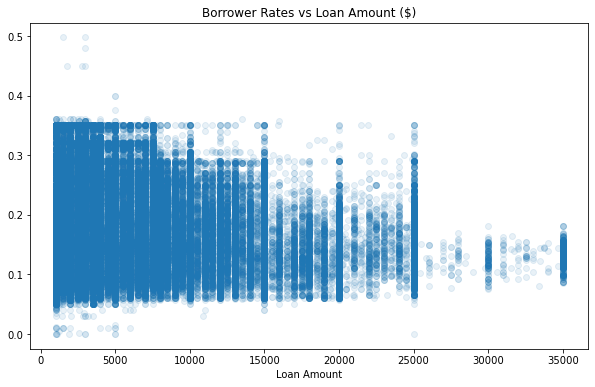

In [58]:
# rates vs loan amount
plt.figure(figsize = (10,6))
plt.scatter(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerRate', alpha = 0.1)


plt.title('Borrower Rates vs Loan Amount ($)')
plt.xlabel('Loan Amount');

Interest rates for the lower loan amounts tend have a wider range than the rates on Loan Amounts at the higher end.  The highest loan amounts have some of the lowest interest rates.  Opposite my initial thought.   

In [59]:
loans.LoanOriginalAmount.describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

In [60]:
loans.BorrowerRate.describe()

count    113066.000000
mean          0.192946
std           0.074917
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250600
max           0.497500
Name: BorrowerRate, dtype: float64

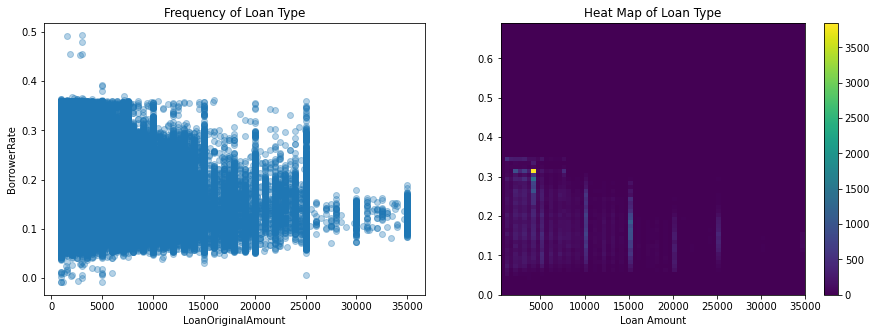

In [61]:
# biivariate plot between BorrowRate LoanOrginalAmount
#What is the proportion of loan type based on interest rate and borrow rate?
plt.figure(figsize = [15, 5])

bins_x = np.arange(500, 35000+500, 500)
bins_y = np.arange(0.0, 0.6+.1, .01)

plt.subplot(1, 2, 1)
sb.regplot(data = loans, x='LoanOriginalAmount', y = 'BorrowerRate', fit_reg = False, x_jitter = 0.2, y_jitter = 0.01, scatter_kws = {'alpha' : 1/3})
plt.title('Frequency of Loan Type')

plt.subplot(1, 2, 2)
plt.hist2d(data = loans, x='LoanOriginalAmount', y = 'BorrowerRate',bins = [bins_x,bins_y])
plt.title('Heat Map of Loan Type')
plt.xlabel('Loan Amount')
plt.colorbar();

The most common loan is 5k  at an interest rate of about 0.32.  There also seems to be many loans at $15k with and interest rate of 0.2.

Next, I'll check the relationship between key numerical & categorical values that describe a borrower's demographic/behavioral context with a borrower's interest rate.  First I will plot a heat graph using the correlations between numeric variables.  the pandas correlation function will be used.  

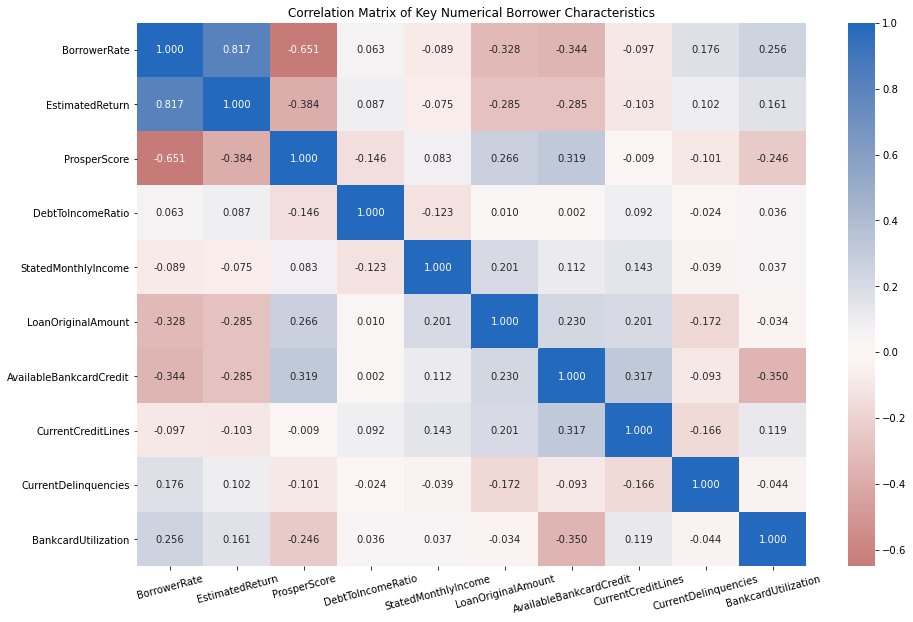

In [62]:
numeric_vars = ['BorrowerRate', 'EstimatedReturn', 'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'AvailableBankcardCredit','CurrentCreditLines','CurrentDelinquencies','BankcardUtilization']
plt.figure(figsize = [15, 10])
ax = plt.axes()
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0, ax = ax)
plt.xticks(rotation = 15)
ax.set_title('Correlation Matrix of Key Numerical Borrower Characteristics')
plt.show()

BorrowerRate rate is most correlated with estimated return, Prosper Score, and Loan Original Amount and AvailableBankCredit.

Lets view the same numeric variables with a matrix of scatterplots using seaborns PairGrid.  I will use a sample of loans to reduce overlap if possible.

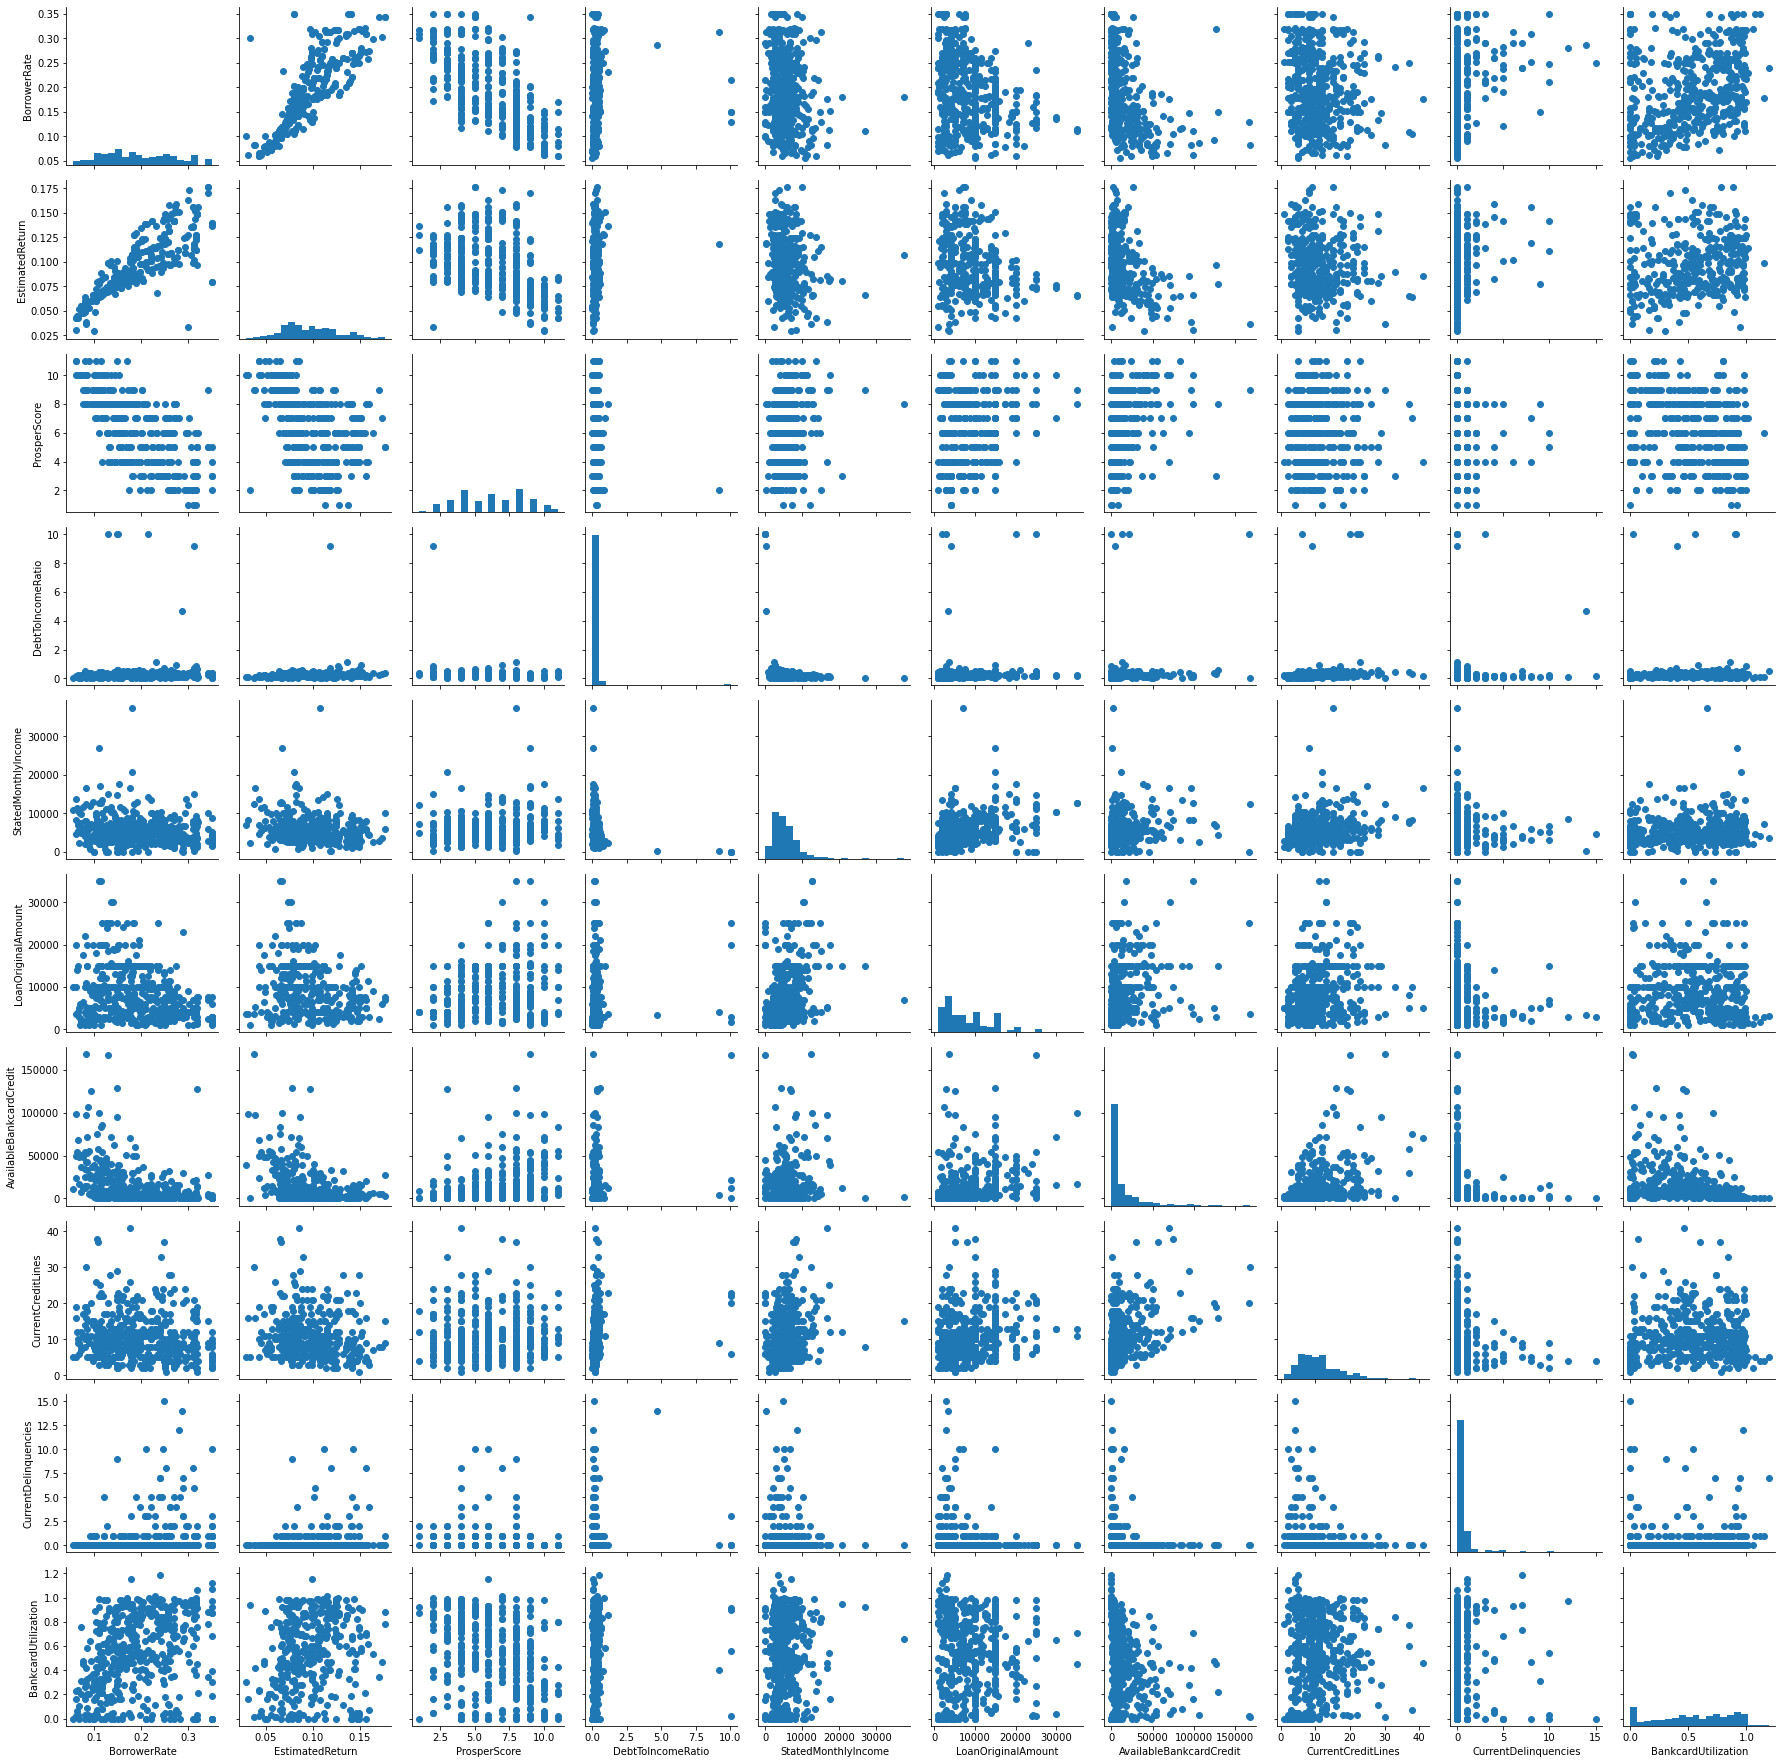

In [63]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster

samples = np.random.choice(loans.shape[0], 500, replace = False)
loans_samp = loans.reindex(samples) #line 2 change: previous attempt with loc produced reindex error

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Unfortuntaley, the PaidGrid above doesnt really tell us much we dont already know and is hard to read.  Lets take a closer look at the relationship between AvailableBankcardCredit and the Borrower APR. 

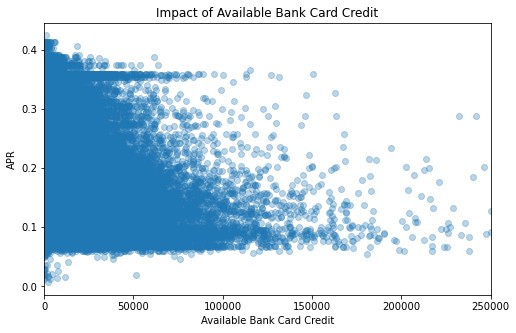

In [64]:
plt.figure(figsize = [8, 5]);# bivariate scatterplot
plt.scatter(data = loans, x = 'AvailableBankcardCredit', y = 'BorrowerAPR', alpha = 3/10);
plt.xlim([0, 250000])
plt.xlabel('Available Bank Card Credit');
plt.ylabel('APR');
plt.title('Impact of Available Bank Card Credit');

The plot clearly shows that the more available bank credit the borrower has, the lower the rate on the loan will be in most cases.

Lets check out the relationship between debt and borrower rate.  To view this plot, I had to put limits on the X axis using the pandas quantile method.  The quantile () method calculates the quantile of the values in a given axis.  In this case the limit was placed to 99 percent of the data.

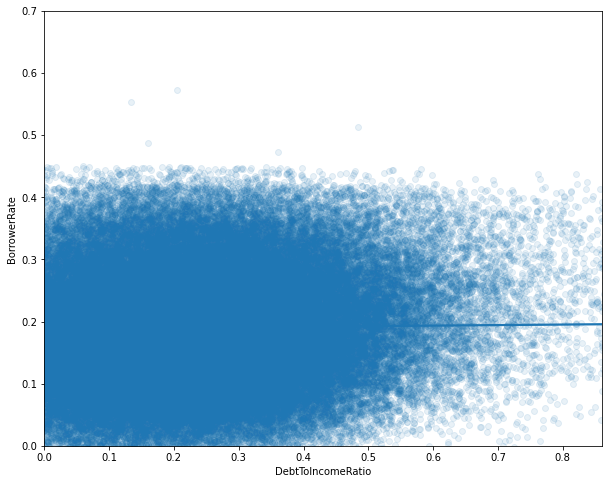

In [65]:
# biivariate plot between DebtToIncomeRatio and BorrowerRate with 1 percent outlier removed 

plt.figure(figsize = [10, 8])
sb.regplot(data = loans, x = 'DebtToIncomeRatio', y = 'BorrowerRate', x_jitter = 0.2, y_jitter = 0.1, scatter_kws = {'alpha' : 0.1}) 
plt.xlim(0, loans.DebtToIncomeRatio.quantile(0.99))# limit the scale using the pandas quantile method
plt.ylim(0,0.7);


The Borrower Rate starts to increase at about 0.4 Debt to Income Ratio.  At Debt to Income Ratio of over 0.5, the BorrowerRate is almost 0.2 and higher.  Borrowers should try to keep their Debt to Income Ratio below 0.4.

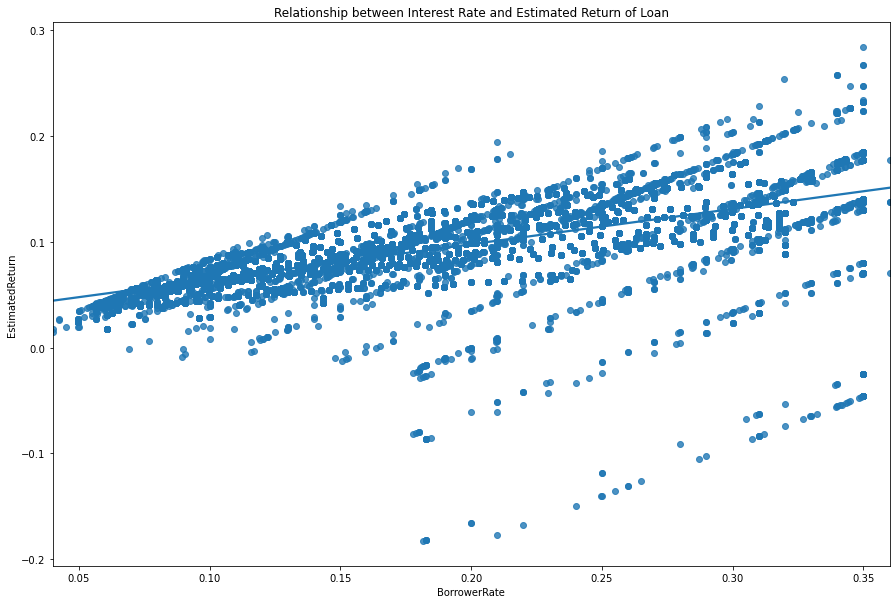

In [66]:
 # biivariate plot between BorrowerRate and EstimatedReturn 
plt.figure(figsize = [15, 10])
sb.regplot(data = loans, x = 'BorrowerRate', y = 'EstimatedReturn')
plt.title('Relationship between Interest Rate and Estimated Return of Loan');

This chart is something the lender has to keep in mind which is that most losses to the lender occurred with higher interest rate loans

Next, lets take a look at the categorical data.  One numeric versus one categorical variable can be best illustrated by violin, box or barplot

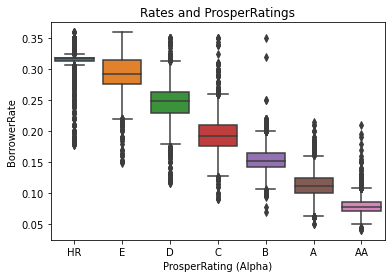

In [67]:
df = sb.boxplot(x="ProsperRating (Alpha)", y="BorrowerRate", data=loans) # boxplot of ratings vs rate
plt.title('Rates and ProsperRatings');

The chart very clearly illustrates that Rates drop as the Prosper rating increases.  ProsperRating is ordered from most to least risky borrowers.

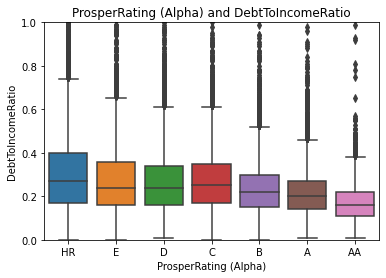

In [68]:
df = sb.boxplot(x="ProsperRating (Alpha)",y="DebtToIncomeRatio",data=loans)
plt.ylim(0, 1) 
plt.title('ProsperRating (Alpha) and DebtToIncomeRatio');

Debt/Income has an inverse effect on ProsperRating

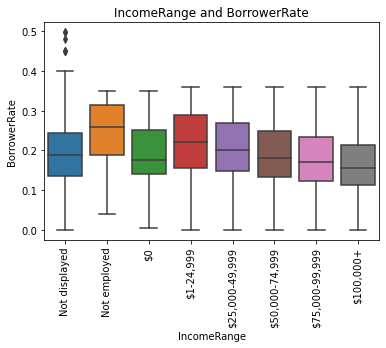

In [69]:
df = sb.boxplot(x="IncomeRange", y="BorrowerRate",data=loans)
plt.xticks(rotation=90)
plt.title('IncomeRange and BorrowerRate');

Higher Income Range results in lower average Borrower Rate.

The violin plot below shows that average rates fall with every step higher in income range

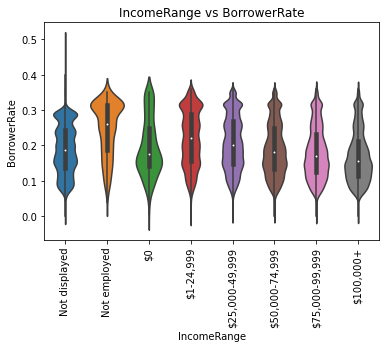

In [70]:
sb.violinplot(x="IncomeRange", y="BorrowerRate", data=loans)
plt.title('IncomeRange vs BorrowerRate')
plt.xticks(rotation=90);
plt.show()

Higher Income Range results in lower average borrower rates.

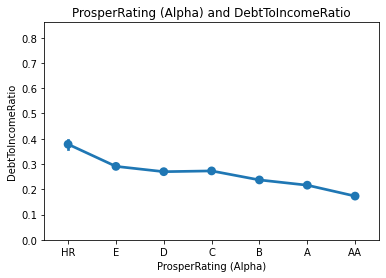

In [71]:
df = sb.pointplot(x="ProsperRating (Alpha)", y="DebtToIncomeRatio", data=loans)  

plt.ylim(0, loans.DebtToIncomeRatio.quantile(0.99))  #use 99 percent of the data in column to remove outliers 
plt.title('ProsperRating (Alpha) and DebtToIncomeRatio');

lower D/E ratio results in higher rating

Next we will check out the relationship between homeownership and credit grades and the Prosper Rating.

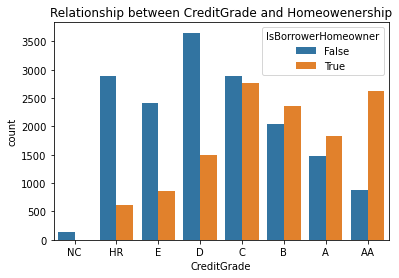

In [72]:
# biivariate plot between IsBorrowerHomeOwner and CreditGrade
#Is it a trend between being a homeowner and the type of credit grade you have?

sb.countplot(data = loans, x = 'CreditGrade', hue = 'IsBorrowerHomeowner');
plt.title('Relationship between CreditGrade and Homeowenership');

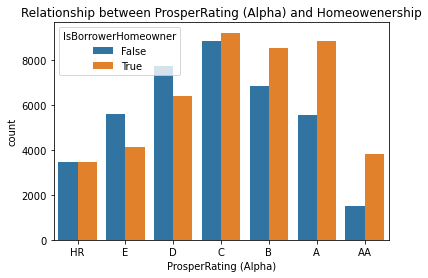

In [73]:
# biivariate plot between IsBorrowerHomeOwner and CreditGrade
#Is it a trend between being a homeowner and the type of credit grade you have?

sb.countplot(data = loans, x = 'ProsperRating (Alpha)', hue = 'IsBorrowerHomeowner');
plt.title('Relationship between ProsperRating (Alpha) and Homeowenership');

We can see from the plots above that the majority of credit worth borrowers (C grade or higher) are homeowners.  Lets take a closer look at borrower rates and homeownership across credit grades.

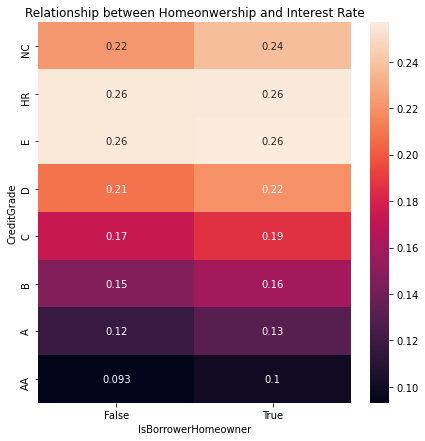

In [74]:
# biivariate plot between IsBorrowerHomeOwner and CreditGrade and average Interest Rate
#Is there an affect of borrower being a homeowner on interest rate across credit grade groups?

plt.figure(figsize = [7,7])
homeowner_counts = loans.groupby(['CreditGrade','IsBorrowerHomeowner']).mean()
borrowerrate_counts = homeowner_counts['BorrowerRate']
borrowerrate_counts = borrowerrate_counts.reset_index(name = 'count')
borrowerrate_counts = borrowerrate_counts.pivot(index = 'CreditGrade', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(borrowerrate_counts, annot = True)
plt.title('Relationship between Homeonwership and Interest Rate');

It doesnt look like owning a home has much of an effect on interest rate across credit grades.  In fact, as the heat map above shows, owning a home actually results in higher borrower rates for D grade borowers and above.

Lets take a closer look at the borrowers income.

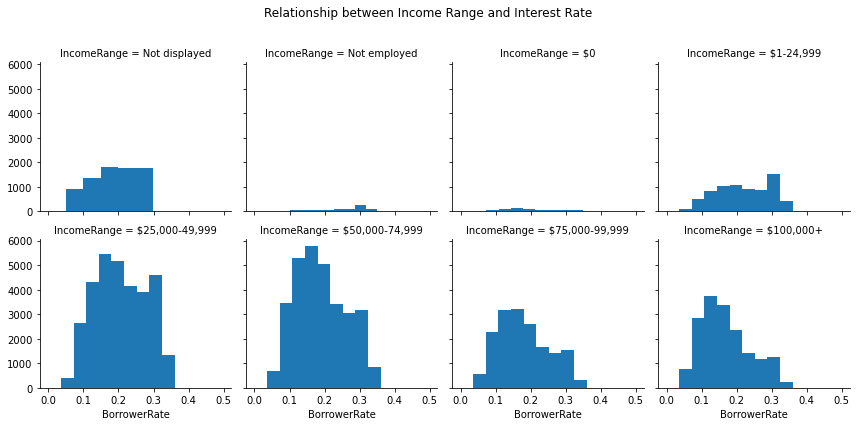

In [75]:
#bivariate plot between BorrowerRate across IncomeRanges
#Does income bracket affect the frequency of levels of interest rates?

g = sb.FacetGrid(data = loans, col = 'IncomeRange', col_wrap = 4) #adjust col wrap to increase visibilty
g.map(plt.hist, 'BorrowerRate')
plt.subplots_adjust(top=.85)
g.fig.suptitle('Relationship between Income Range and Interest Rate');

A trend is visible in the Facetgrid above in that loans where the borrower is making less than $\$$25,000 a year tend to have higher interest rates than those making above that amount.  The most common frequency rates for borrowers making above $\$$25,000 is less than 0.2, while the most common interest rate for those making less than $\$$25,000 is 0.3 and higher.

The year in which the loan was created can tell us a little but about how the general interest rate environment affects a loans rate.  To look at the year, I will first have to convert the listing year column to datetime format and extract the data I am looking for, which is the year.  

In [76]:
# Add a new column to extract the year from the loans creation date
loans['listingyear'] = pd.DatetimeIndex(loans['ListingCreationDate']).year # method to convert to datetime format
loans['listingyear'].head()

0    2007
1    2014
2    2007
3    2012
4    2013
Name: listingyear, dtype: int64

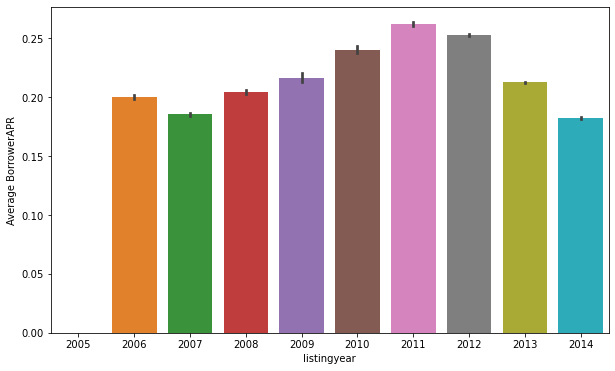

In [77]:
plt.figure(figsize = [10,6]) #bivariate chart of listing year by borrower APR

order=loans.listingyear.value_counts().index[:7]
sb.barplot(data = loans, x = 'listingyear', y = 'BorrowerAPR'),
plt.ylabel("Average BorrowerAPR")
plt.title('APR by Listing Year');

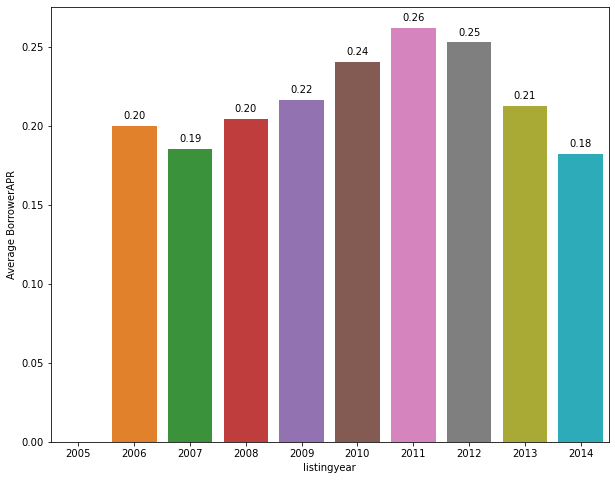

In [78]:
plt.figure(figsize=(10, 8)) # bivariate chart with labels on bars
order=loans.listingyear.value_counts().index[:7]

splot = sb.barplot(data=loans , x = 'listingyear', y = 'BorrowerAPR', ci = None)
for p in splot.patches:  # add the average borrower rate to the top of the bars
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.ylabel("Average BorrowerAPR")
plt.title('APR by Listing Year');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are some interesting relationships in this part of the investigation that should be analyzed further like:

* Available Bank Credit impacting rates.  
* Credit Grades effect on BorrowerRate
* Debt/Equity Ratio's impact on ProsperRating.
* The majority of loans going to borrowers making less than 25k are C rated or less.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In general, many of the comparisons arent showing to be very highly correlated.  In the next section, I would like to plot the relationship between Employment Status and Income Range to see if there is an effect on the Borrowers rate.

## Multivariate Exploration


Ill start the multivariate exploration where the bivariate left off, with a closer look at employment statistics.

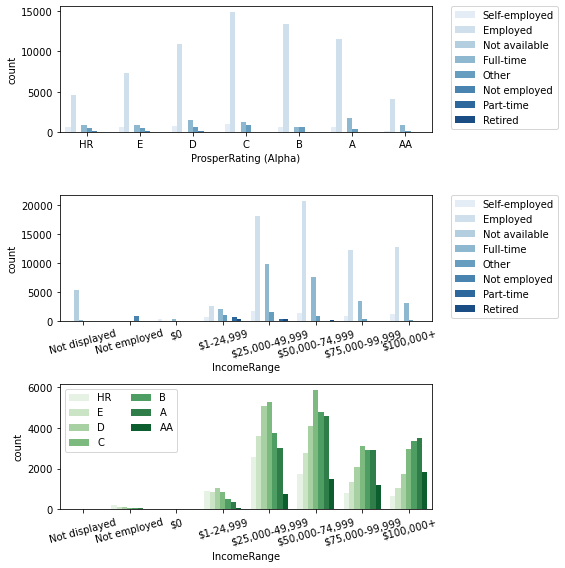

In [79]:
# create bi variate sublots using Prosper Rating and Employment status and Income Range
plt.figure(figsize = [8, 8])

# subplot 1: Rating vs Employment Status
plt.subplot(3, 1, 1)
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # re-arrange legend to reduce overlapping

# subplot 2: IncomeRange vs. Employment Status
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans, x = 'IncomeRange', hue = 'EmploymentStatus', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)

# subplot 3: IncomeRange vs. Rating, using different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loans, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 2, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)

plt.tight_layout()
plt.show()

Employment status and income range have a modest affect on borrower rating.  There is just about the same number of borrowers making 100k with AA rating as there are making 50k and AA rating.  Almost all borrowers have some type of employment.

Next, I would like to know if home ownership and employment status have a significant affect on interest rate?

<Figure size 1080x1080 with 0 Axes>

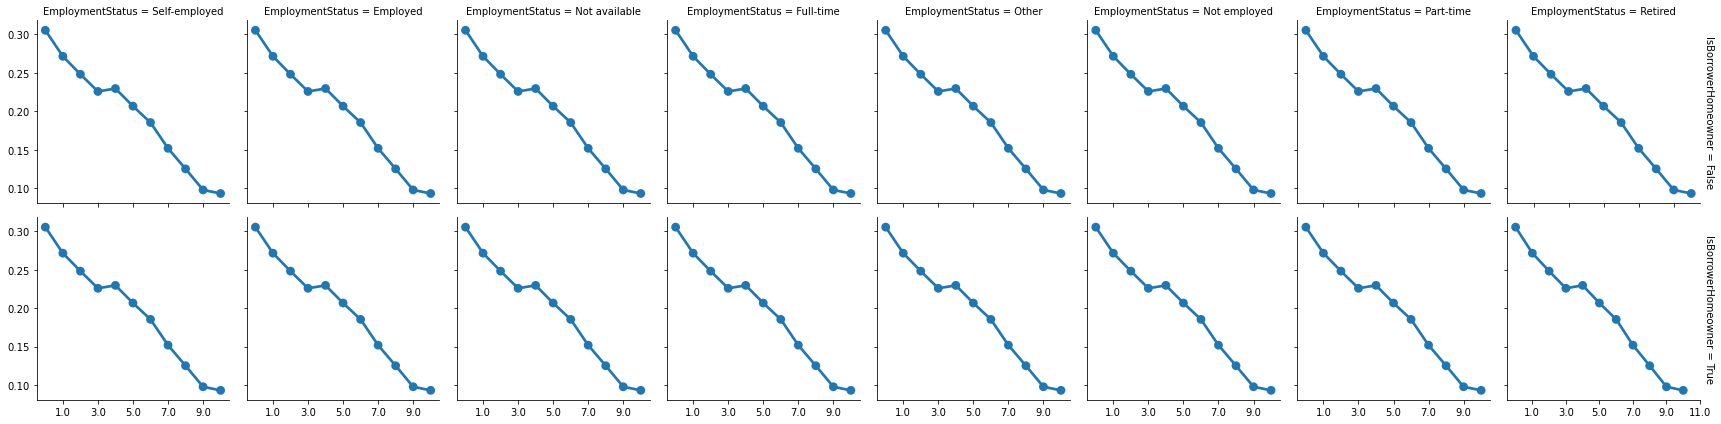

In [80]:
# multivariate plot between EmploymentStatus, ProsperScore, IsBorrowerHomeowner and BorrowerRate 
plt.figure(figsize = [15, 15])
bins_x = np.arange(1, 10+1, 2)
bins_y = np.arange(0.0, 0.5+.1, .01)
g = sb.FacetGrid(data = loans, col = 'EmploymentStatus', row = 'IsBorrowerHomeowner', height = 3,
                margin_titles = True)
g.map(sb.pointplot, data = loans, x = 'ProsperScore', y ='BorrowerRate', bins = [bins_x,bins_y])
ticks = [1,3,5,7,9,11]
plt.xticks(ticks, [float(x) for x in ticks]);

When comparing the columns with each other, the Borrowers rate is about the same across employment categories, with those that have lower ProsperScores having higher interest rates. Similarly, being a homeowner doesn't really have much of an impact on borrower rate. As you can see when you compare rows, the interest rate is about the same betweeen populations that are homeowners versus not homeowners.

After checking homeownership and Employment, I now want to look closer at the ProsperRating.  As ProsperRating is the most negatively correlated variable to borrower rate in our dataset, I want to see if I can find the factors that are influecing the rating. The section below begins with multivariate scatterplots.

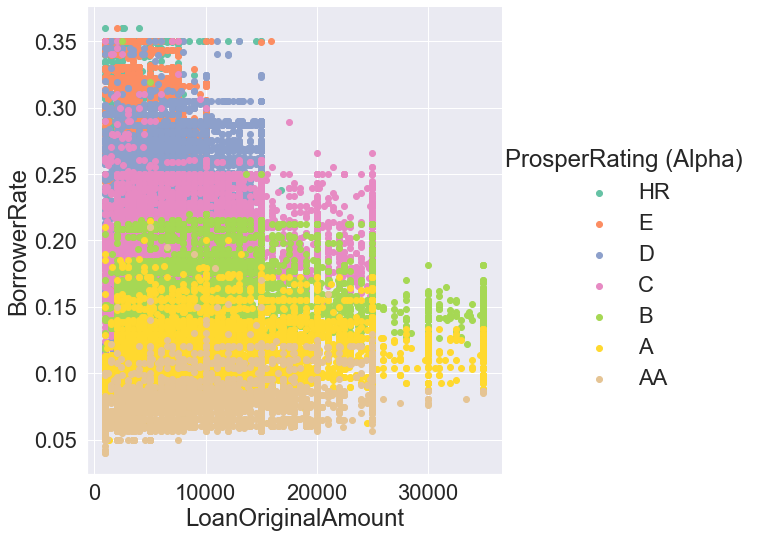

In [102]:
# multivariate plot of rate by loan amount, borrower rate and ProsperRating 
# rate (numerical), loan amount (numerical) and ProsperRating (categorical)
# scatterplot with color encoding

g = sb.FacetGrid(data = loans, hue = 'ProsperRating (Alpha)', height= 8, palette = 'Set2')
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
g.add_legend();


Below 15,000 USD, loans are given out across Prosper Rating and loan amount.  Loans above 15,000 USD are primarily given to borrowers with C rating or higher.  Loans above 25,000 USD are mostly for borrowers with B rating or higher.  One interesting obesrvation is that the interest rate for B and A grade borrowers actually declines as loan amount increases, while the rate for highest rated AA loans increases for loans over 25,000 USD.  This suggests that there is another factor which is influencing the rate of borrowers with at least a B grade'

Lets take a look again at Employment Status as this variable has shown to have a modest effect on the Prosper Rating.

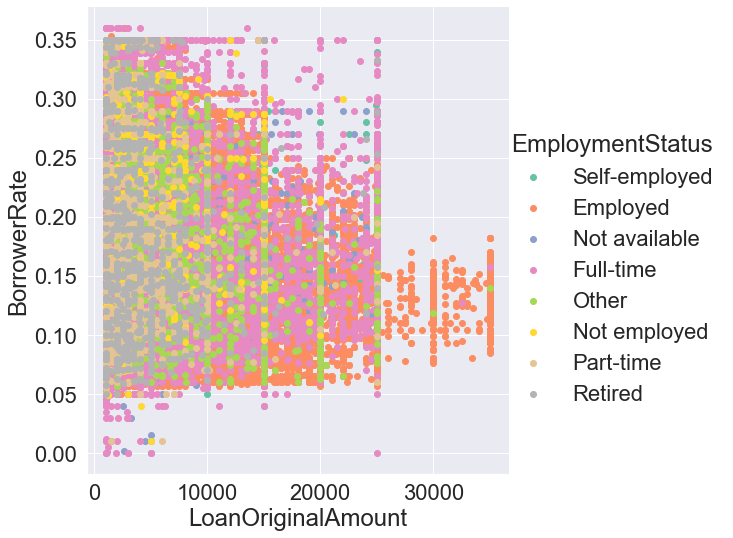

In [101]:
# multivariate plot of rate by loan amount, Borrower Rate and Employment Status
# rate (numerical), loan amount (numerical) and ProsperRating (categorical)
# scatterplot with color encoding
g = sb.FacetGrid(data = loans, hue = 'EmploymentStatus', size= 8, palette = 'Set2')
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
g.add_legend();


Loans above 15,000 USD are mostly for borrowers with a Full-time job.  Almost all of loans above 25,000 USD for borrowers with some kind employment  Loans below 5,000 USD went primarily to retired, part- time workers and the unemployed. 

Another important feature of a loan is the time it takes to pay it back, or the loan Term.  Lets take a look at that now.

In [83]:
loan_data_sample = loans.sample(500, random_state=42) # create a sample df of 500 loans

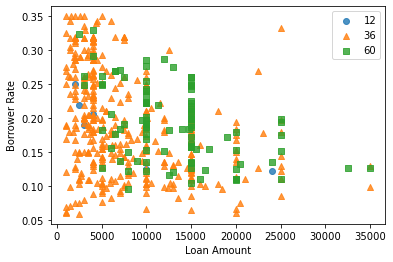

In [84]:
# Term is categorical ordinal 
# loan amount and borrower rate are numeric continuos
ttype_markers = [[12, 'o'],
                 [36, '^'],
                 [60, 's']]

for ttype, marker in ttype_markers: 
    plot_data = loan_data_sample.loc[loan_data_sample['Term'] == ttype]
    sb.regplot(data = plot_data, x = 'LoanOriginalAmount', y = 'BorrowerRate', x_jitter=0.1, fit_reg = False, marker=marker);
plt.xlabel('Loan Amount')
plt.ylabel('Borrower Rate')
plt.legend (['12','36','60']);

What the multivariate plot above shows is that most of the long term loans (60 months) are for 10k and higher loan amounts.  Also interesting is the rate for loans in the 15,000 USD range is lower than the rate for 10,000 USD loans with a 60 month term.  As our multivariate scaterrplot above shows, loans above 15,000 are primarily for C rated borrowers and higher, which might explain the lower rates on average as compared to the 10,000 USD loans.

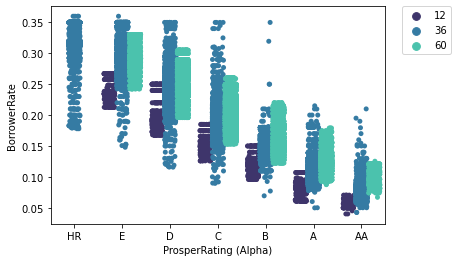

In [85]:
# scaterrplot with jitter and dodge
sb.stripplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue ='Term', 
    jitter=0.35, dodge=True, palette="mako")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

The longer the loan terms, the higher the interest rate within each Loan Rating.  Higher rated borrowers use longer loan terms at lower rates than lower rated borrowers.  This is most likely because the average loan amount is typically larger for higher rated borrowers. 

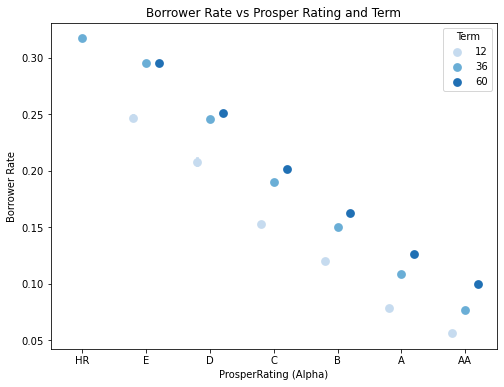

In [86]:
fig = plt.figure(figsize = [8,6]) # multivariate point plot 
ax = sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower Rate vs Prosper Rating and Term')
plt.ylabel('Borrower Rate')
ax.set_yticklabels([],minor = True)
plt.show();

Longer term loans result in higher rates across all Prosper ratings.

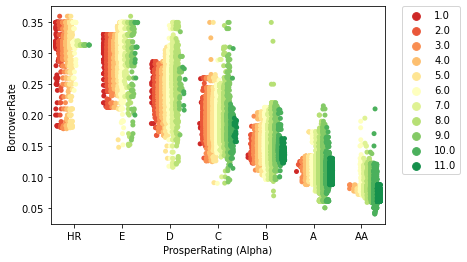

In [87]:
# 2 categorical ProsperRating and Prosper Score, and 1 continous variable (rate)
sb.stripplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue ='ProsperScore',
    jitter=0.35, dodge=True, palette="RdYlGn")
plt.title('Prosper Rating (Alpha) by borrower rate and Prosper Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

The plot above shows that around C grade, there is a shift from lower prosper scores to higher that corresponds as you move into the middle and higher rated borrowers.

We know that DebttoIncome affects the borrower rate, so I'm going to look further at borrowers debt starting with monthly payment.

Another nice multivariate plot to view is the 2 dimensional histogram using color as the 3rd variable.  I would like to take a look at the borrowers monthly payment more closely. For this to happen, I will have to check the number of bins in each column first.  See below:

In [88]:
#create new dataframe
# remove NA from variables for plt.hist2d
df_2dHist=loans[['OpenRevolvingMonthlyPayment','CurrentDelinquencies']].dropna()

In [89]:
#how many categories in each column
print('OpenRevolvingMonthlyPayment:', len(df_2dHist.OpenRevolvingMonthlyPayment.unique()))
print('CurrentDelinquencies:', len(df_2dHist.CurrentDelinquencies.unique()))

OpenRevolvingMonthlyPayment: 2834
CurrentDelinquencies: 47


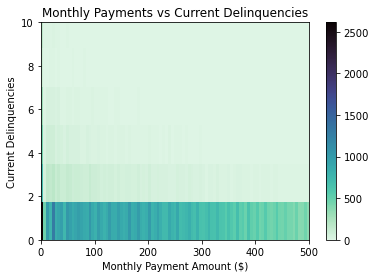

In [90]:
# 2 dimensional histogram
plt.hist2d(data = df_2dHist, 
           x = "OpenRevolvingMonthlyPayment",
           y = "CurrentDelinquencies", 
           bins=(2834, 47), cmap="mako_r")  

plt.ylim(0,10)

plt.xlim(0,500)
plt.title('Monthly Payments vs Current Delinquencies')
plt.xlabel('Monthly Payment Amount ($)')
plt.ylabel('Current Delinquencies')
plt.colorbar();

Very interesting observation in the plot above is that there are more delinquencies for borrowers with smaller revolving loan amounts.  Conversely, this means borrowers with less delinquencies have higher monthly payments.  As far as Debt to Income goes, the more overall debt the borrower has in the form of higher payments is being offset by the borrowers income.

More information on the borrowers credit history can be found in the loan status column.  Lets look further at this column against 3 other categorical variables.

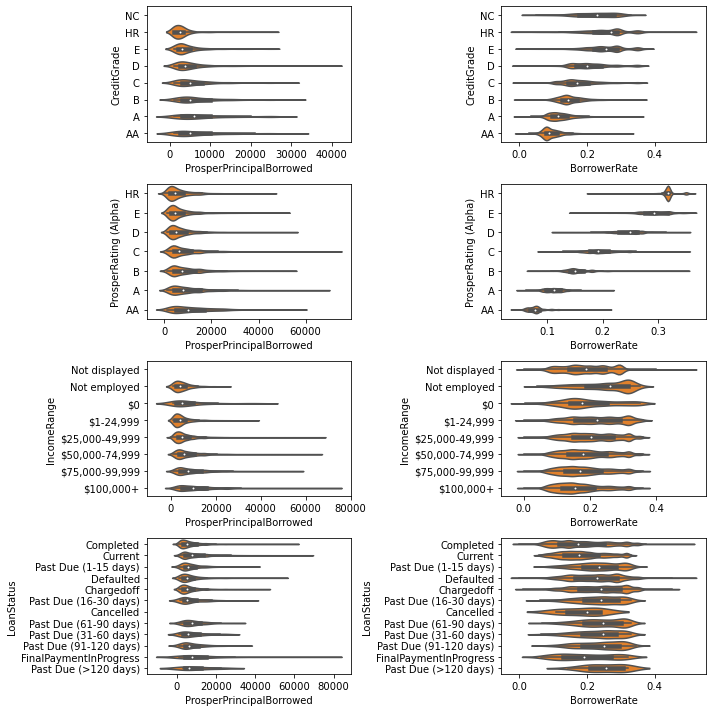

In [91]:
# plot the categorical variables against BorrowerAPR and ProsperPrincipalBorrowed again


categoric_vars = ['CreditGrade', 'ProsperRating (Alpha)', 'IncomeRange', 'LoanStatus']
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    default_color = sb.color_palette()[1]
    sb.violinplot(data = loans, y = var, x = 'ProsperPrincipalBorrowed', ax = ax[i,0],
               color = default_color, orient = "h")
    
    
    sb.violinplot(data = loans, y = var, x = 'BorrowerRate', ax = ax[i,1],
               color = default_color, orient = "h")
    
plt.tight_layout()
plt.show()

The multivariate chart continues the story of what our earlier observations showed about income ranges and Credit Grades and their effect on the borrower rate.  It also shows how defaults really hurt the borrower rate.  One can also infer that defualts or delinquencies occur on smaller loans on average when compared to larger loans.  Also, current loans have a higher loan amounts.  Having loans that are past due result in higher borrower rates and also smaller Principal amount borrowed.

One intersting variable we noted in the bivariate section was the listing years effect on the rate.  Lets explore that further with multivariate plot.

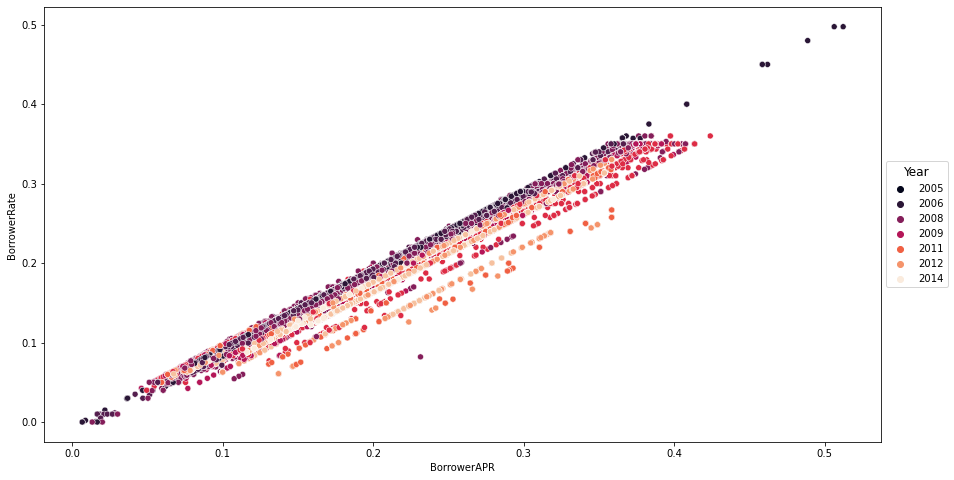

In [92]:
plt.figure(figsize = [15,8])#multivariate chart of borrower rate by the listing year 

sb.scatterplot(data = loans, x = 'BorrowerAPR', y = 'BorrowerRate', hue ='listingyear',palette="rocket");
   
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title='Year', title_fontsize=12);

As we noted earliier, the year the loan was issued, and the overall market conditions has a big impact on the borrower rate.  From 2005 to 2009, interest rates moved by almost .05 basis points which is a pretty large relative move.  

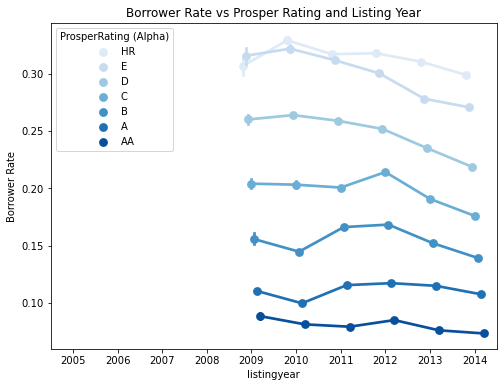

In [93]:
# mutlivariate chart of borrower rate by listing year and ProsperRating.
# 1 quantitative categorical variable (Listing year)
# 1 qualitative categorical (ProsperRating)
# 1 numeric continuos (BorrowerRate)
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x = 'listingyear', y = 'BorrowerRate', hue = 'ProsperRating (Alpha)',
           palette = 'Blues', dodge = 0.4)
plt.title('Borrower Rate vs Prosper Rating and Listing Year')
plt.ylabel('Borrower Rate')
ax.set_yticklabels([],minor = True)
plt.show();

Rates trend in the same general direction ( up or down) across Prosper rating on an annual basis.  Lower credit rating (B and lower) seem to be more affected by the overall market than the higher rateed borrowers.

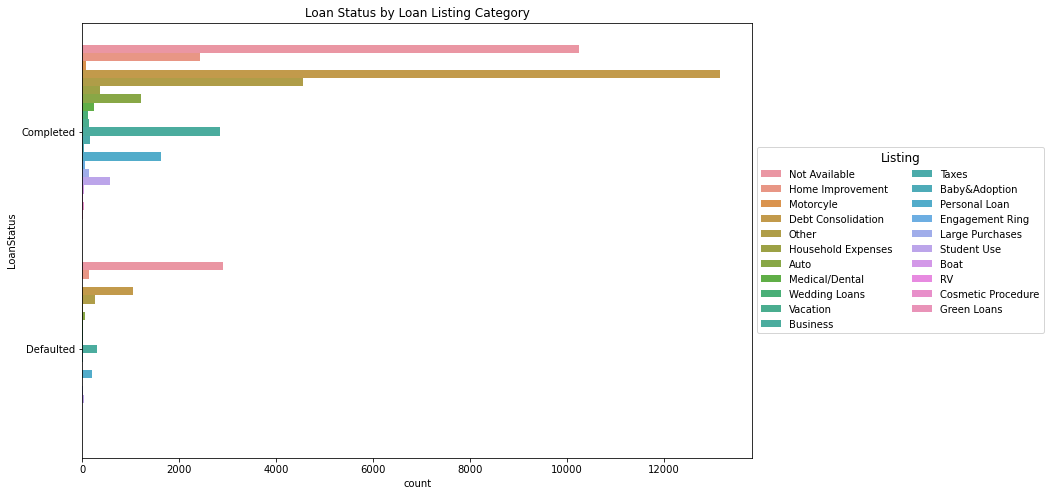

In [94]:
plt.figure(figsize = [12,8]) # multivariate bar chart of loan status by listing category and status
sb.countplot(data = loans, y = 'LoanStatus', hue = 'ListingCat', orient='h',
          order=['Completed','Defaulted'])
plt.xticks(rotation=0)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title='Listing', title_fontsize=12, ncol=2);
plt.title('Loan Status by Loan Listing Category')
plt.show()

A closer look at defaults shows that most of the loans that were defaulted on were marked "Not Available".  It would be good to know this information.

If higher credit scores lead to lower rates, lets see how the borrower rate is effected by verified income against credit scores. 

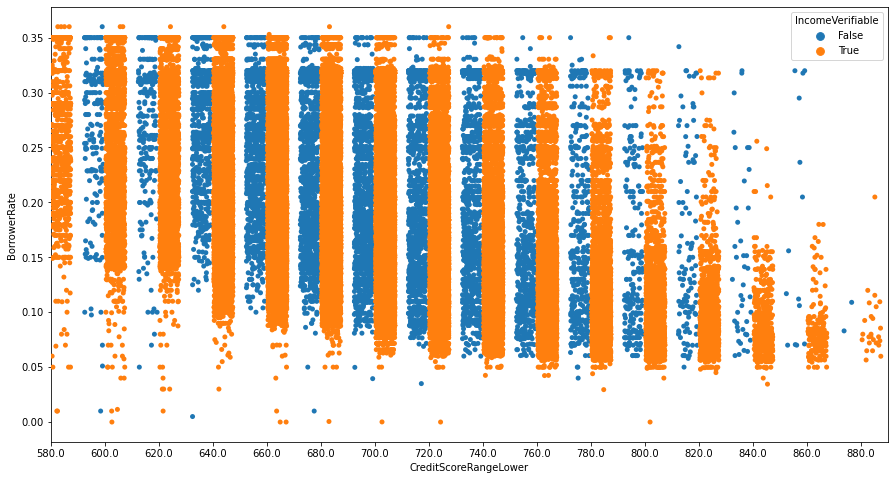

In [96]:
#multivariate plot, IncomeVerifiable column is Boolean dtype.  Categorical nominal variable
plt.figure(figsize = [15,8])
sb.stripplot(data = loans, x = 'CreditScoreRangeLower', y = 'BorrowerRate', hue ='IncomeVerifiable',
    jitter=0.35, dodge=True),

# get current tick positions and labels
pos, labs = plt.xticks();


# limit x value
plt.xlim(10,None);

This is a great plot which shows that Income verification leads to lower rates for borrowers within the same credit scores.  Conversely, credit scores increase the more incomes are verified.

### Heat Maps
A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d() function.

Heat maps are useful in the following cases:

* To represent a plot for discrete vs. another discrete variable
* As an alternative to transparency when the data points are enormous

The heat map below nicely displays that the lower prosper rating will have include lower Credit Scores and higher rates for borrowers. 

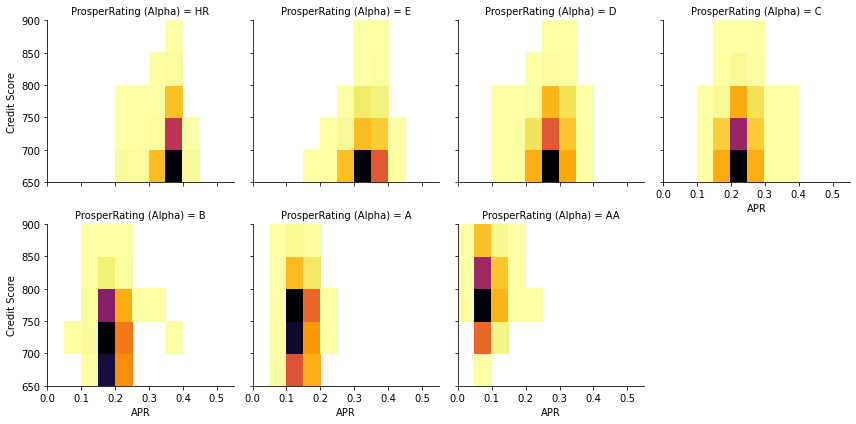

In [97]:
# multivariate heat map of 2 discrete variables and one numeric
def hist2dgrid(x, y, **kwargs):  
    """ function for creating heat maps with seaborn . """
    palette = kwargs.pop('color');
    bins_x = np.arange(0, loans['BorrowerAPR'].max()+0.05, 0.05);  #bin interval .05 
    bins_y = np.arange(650, loans['CreditScoreRangeUpper'].max()+50, 50); #bin interval 50
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5); 


g = sb.FacetGrid(data = loans, col = 'ProsperRating (Alpha)', col_wrap=4, height = 3);

g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeUpper', color = 'inferno_r');

g.set_xlabels('APR');

g.set_ylabels('Credit Score');

Finally, lets create some multivariate plots with our main variable, borrower rate, in mind.  

First, lets go back to Stated monthly income column and plot vs loan amounts and rates.  We will need a sample if the data and also drop the cells marked NA before creating this numeric scatterplot.

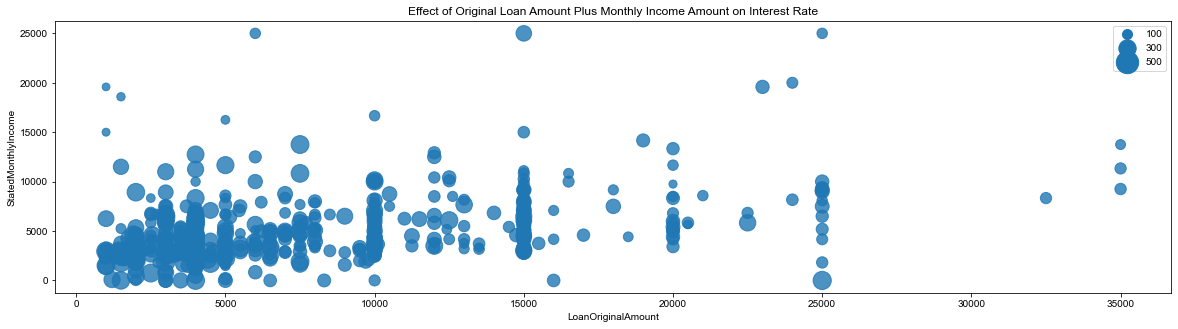

In [98]:
# multivariate plot between StatedMonthlyIncome, LoanOriginalAmount, BorrowerRate
#How does someone's monthly income and loan amount affect their interest rate?

plt.figure(figsize = [20,5])


loans_subset=loans.sample(500, random_state=42).dropna(subset=['LoanOriginalAmount','StatedMonthlyIncome','BorrowerRate'])

sb.regplot(data = loans_subset, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', fit_reg = False, 
           scatter_kws = {'s': loans_subset['BorrowerRate']*1000}, truncate = True)


sizes = [100, 300, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
plt.title('Effect of Original Loan Amount Plus Monthly Income Amount on Interest Rate')
sb.set(font_scale = 2)

Rates are definitely lower for the same loan amounts as monthly income increases.  This is especially true for loans over 15,000 USD.  It is also noteworthy that some of the highest borrower rates are seen on loans with small loan amounts and higher incomes.  This could be for borrowers who are repairing their credit and/or have minimal credit history.

We know that debt to income ratio effects the borrower rate.  It would be good to know how available credit, or more added debt, would effect the borrower rate.  The BankCardUtilization column lets us know how much percentage of available credit the borrower has at the time of the listing.

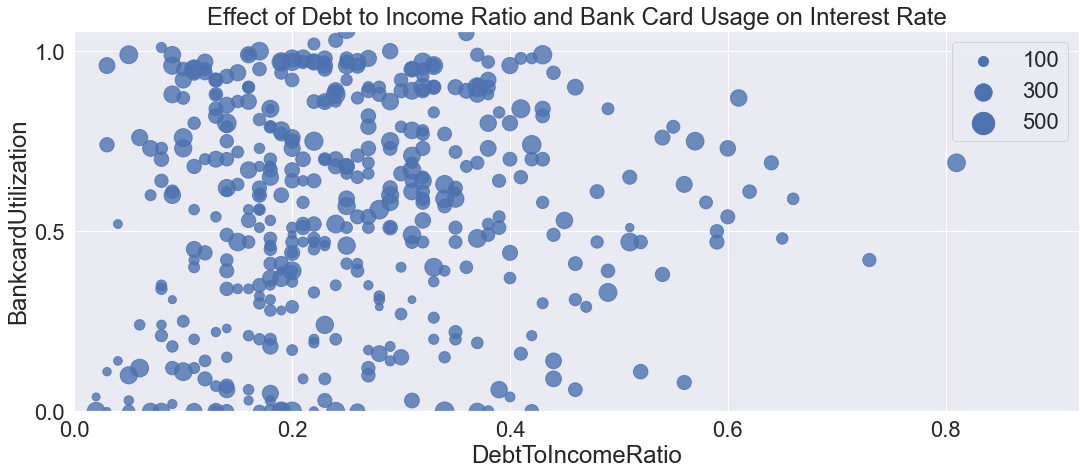

In [99]:
#multivariate plot of 3 numeric variables
plt.figure(figsize = [18,7])

loans_subset=loans.sample(500, random_state=42).dropna(subset=['DebtToIncomeRatio','BankcardUtilization','BorrowerRate'])

sb.regplot(data = loans_subset, x = 'DebtToIncomeRatio', y = 'BankcardUtilization', fit_reg = False, 
           scatter_kws = {'s': loans_subset['BorrowerRate']*1000}, truncate = True)

plt.xlim(0, loans_subset.DebtToIncomeRatio.quantile(0.99))
plt.ylim(0, loans_subset.BankcardUtilization.quantile(0.99))

sizes = [100, 300, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
plt.title('Effect of Debt to Income Ratio and Bank Card Usage on Interest Rate')
sb.set(font_scale = 5 )

The plot above demonstrates again just how important debt is to the borrowers rate, where the lower the debt to income ratio, the lower the borrower rate in most cases.  It is also very evident that a borrower will receive lower rates if he has lower bank card utilization.  

Higher incomes result in lower debt to income ratios.  The below plot shows the relationships between monthly incomes, loan amounts, and borrower rates.

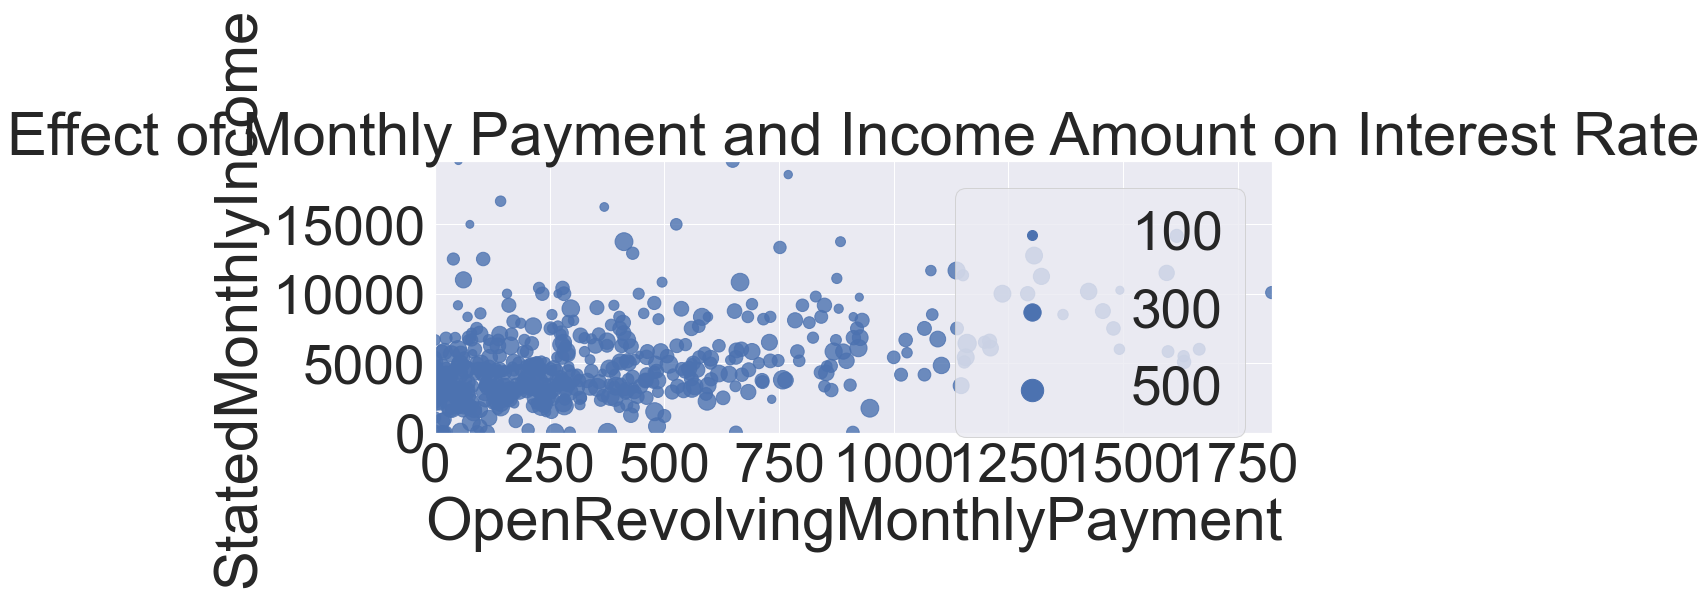

In [100]:
# multivariate plot between StatedMonthlyIncome, LoanOriginalAmount, BorrowerRate
#How does someone's monthly income and loan amount affect their interest rate?

plt.figure(figsize = [15,5])

loans_subset=loans.sample(500, random_state=42).dropna(subset=['OpenRevolvingMonthlyPayment','StatedMonthlyIncome','BorrowerRate'])

sb.regplot(data = loans_subset, x = 'OpenRevolvingMonthlyPayment', y = 'StatedMonthlyIncome', fit_reg = False, 
           scatter_kws = {'s': loans_subset['BorrowerRate']*1000}, truncate = True)

plt.xlim(0, loans_subset.OpenRevolvingMonthlyPayment.quantile(0.99))
plt.ylim(0, loans_subset.StatedMonthlyIncome.quantile(0.99))

sizes = [100, 300, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
plt.title('Effect of Monthly Payment and Income Amount on Interest Rate')
sb.set(font_scale = 2)

The plot above shows nicely that some of the highest borrower rates are given to loans with high incomes and lower monthly payment.  What this ultimately means is that some borrowers can actually lower their rate on a loan if they take on more debt! Unfortunately, this relationship only hold true until the monthly payment really starts to hurt the debt to income ratio whis in the chart above looks to be at around 750 USD in monthly payments for most borrowers.   

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Two interesting variables that stood out to me over this part of the investigation are current delinquencies and the Debt/Equity Ratio.  Where high rated borrowers almost always had one or less delinquencies and low debt/equity ratio.  And the reverse was true for low rated borrowers, who not only had more delinqencies, but also lower revolving balance.

Addiotionally, it was interesting how much effect the Term of the loan had on the loan rate, where the longer the loang the term, resulted in a higher BorrewerRate within the same credit grade.  

### Were there any interesting or surprising interactions between features?

One big surprise for me was that a higher OpenRevolvingMonthly Payment corresponded to a more credit worthy borrower and lower rates, given how much of an impact the Debt/Income ratio has on the borrower rate.  Thus, a borrower can minimize the borrower rate on loans by keeping the monthly payment at an amount where its just high enough that it doesnt go over a debt to income ratio level that will in turn lower the borrwers credit rating or score.